In [9]:
# 分析用
import numpy as np

# プロット用
import matplotlib.pyplot as plt
%matplotlib inline

# 機械学習用
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

# データ
X = np.load('n73-x.npy')
y = np.load('n73-y.npy')

In [10]:
print(X, y)
print(len(X), len(X[0]), len(y))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [0 0 0 ... 0 0 1]
10661 8289 10661


In [39]:
ss = ShuffleSplit(n_splits=1,
                  train_size=0.8,
                  test_size=0.2,
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [40]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

8528 2133
8528 2133


In [41]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9207317073170732

In [13]:
clf.score(X_test, y_test)

0.7393342709798406

In [44]:
clf.predict(X_test)

array([1, 1, 0, ..., 0, 0, 1])

In [43]:
clf.predict_proba(X_test)

array([[0.4094248 , 0.5905752 ],
       [0.13047303, 0.86952697],
       [0.93524388, 0.06475612],
       ...,
       [0.66840685, 0.33159315],
       [0.98756687, 0.01243313],
       [0.01356425, 0.98643575]])

In [16]:
X_test_value = clf.decision_function(X_test)
X_test_value

array([ 0.36634371,  1.89678282, -2.67017915, ..., -0.7009883 ,
       -4.37487974,  4.28666046])

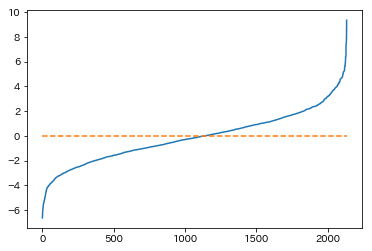

In [22]:
plt.plot(np.sort(X_test_value))
plt.plot([0, 2133], [0, 0], linestyle='--')

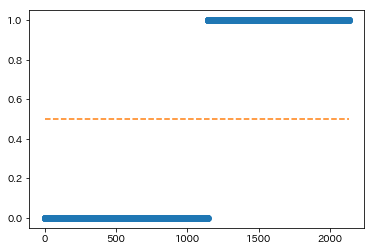

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# plt.plot(np.sort(sigmoid(X_test_value)))
plt.plot(np.sort(clf.predict(X_test)),"o")

plt.plot([0, 2133], [0.5, 0.5], linestyle='--')


In [144]:
w = {k:v for k, v in enumerate(list(clf.coef_[0]))}
sorted(w.items(), key=lambda x: -x[1])

[(2082, 2.065833271114551),
 (7051, 1.7730098898716025),
 (4397, 1.7214264911532642),
 (7655, 1.7019422252928098),
 (5553, 1.6955638533393627),
 (1282, 1.65438433957135),
 (242, 1.6339752148223552),
 (90, 1.6025199910221057),
 (692, 1.5950605167215335),
 (4103, 1.592579176196572),
 (7705, 1.5706491469161037),
 (2137, 1.5699099449643217),
 (2428, 1.5683645809744589),
 (461, 1.5261882457601164),
 (2905, 1.5069149928527015),
 (3493, 1.4967845621059952),
 (584, 1.4956984765700427),
 (7672, 1.4795391427790567),
 (5625, 1.4576094432454456),
 (6390, 1.4406385685081653),
 (6508, 1.4200345655294162),
 (654, 1.4186311537758953),
 (5570, 1.4178695476577998),
 (4019, 1.3973481846123064),
 (312, 1.3757372448729244),
 (5970, 1.3620681046234877),
 (5413, 1.3616702541843697),
 (4594, 1.3613532531949155),
 (545, 1.358128767413622),
 (7462, 1.3535866427929306),
 (4118, 1.3484645536627746),
 (6083, 1.3416166518611623),
 (3482, 1.3269904649325721),
 (5349, 1.294580047566238),
 (58, 1.2905925069173987),
 (

In [155]:
with open('n73-feature.txt') as feature:
    feature = feature.readlines()
    for i, (k, v) in enumerate(sorted(w.items(), key=lambda x: -x[1])):
        if i == 10:
            break
        print(feature[k], v)

engross
 2.065833271114551
urban
 1.7730098898716025
refresh
 1.7214264911532642
remark
 1.7019422252928098
witti
 1.6955638533393627
smarter
 1.65438433957135
confid
 1.6339752148223552
consider
 1.6025199910221057
quiet
 1.5950605167215335
lane
 1.592579176196572
